**DPL-EDA Mini-Project**

Simran Verma  22070126110

Suhani Thakur 22070126115

Twsha Vyass   22070126122

**1. Introduction**

Pune, known as the "Oxford of the East" and the "Cultural Capital of Maharashtra," draws immigrants for a number of reasons, including access to quality education, a thriving job market, and a lively way of life. Moving to Pune, though, can be difficult because housing, money, and transportation problems are common worries.

Finding acceptable housing in Pune can be a difficult undertaking for newcomers due to the real estate market's complexity and fierce competition. Stress is increased by financial difficulties such as living expenses and resource availability. Problems with transportation, like gridlock and few public transportation options, can make life more difficult.
Our objective is to offer a thorough examination of Pune's real estate market, covering issues related to housing, finances, and transportation. By providing newcomers with the information they need to make wise decisions in these areas, this analysis hopes to facilitate and improve their successful transition to Pune.

For those who are just setting out in Pune, this analysis will provide direction and encouragement, enabling them to take advantage of opportunities and get past obstacles in this energetic city.

***1.1 Problem Statement***

"We aim to provide a thorough analysis of Pune's real estate market to assist recently relocated families and individuals who are facing a variety of obstacles, including housing and financial concerns, transportation issues, and more. Our research aims to provide immigrants with the knowledge and tools necessary to make wise housing decisions, ultimately assisting them in moving more successfully."

The most significant of these difficulties is finding acceptable housing in Pune's vibrant and cutthroat real estate market. There are many different housing options available, from shared housing to apartments, but newcomers frequently find it difficult to understand the ins and outs of this market. To find housing that meets individual needs, it is crucial to comprehend pricing dynamics, market trends, and localities.

For the transition to be seamless and financially stable, it is essential to have access to the appropriate information and resources.A seamless and stable financial transition depends critically on having access to the appropriate financial resources and assistance.

Our goal is to present a thorough analysis of Pune's real estate market, taking into account factors related to housing, finances, and transportation. By arming newcomers with information and insights, we hope to facilitate a smooth transition and assist them in taking advantage of the opportunities Pune has to offer while overcoming any obstacles they may face. This project aims to create the foundation for a prosperous and satisfying journey in this dynamic city, not just to solve immediate problems.

***1.2 Problem Description***

Instant Data Scraper is a Chrome extension that was used to scrape our dataset from the makaan.com website.We succeeded in scraping roughly 10,000 rows.

Description of the dataset:
Comprehensive information on house prices in various Pune localities is included in our dataset. There are 12 columns and 10020 rows in the dataset. The 12 columns consist of:

1.seller name: name of the seller who is selling the house.

2.seller type: it tells whether the house was sold by the owner of the house,
               through an agent or by the builder.

3.layout type: whether it is a BHK, RK or a Residential plot.

4.property type: which type of property is it- an independent floor,apartment,
                 studio apartment, villa, independent house or a penthouse.

5.projName: Name of the project/society.

6.location: gives us where the house is located.

7.price: what is the price of the house

8.unit: what is the unit of price(L or Cr)

9.area: carpet area of the house

10.Status: status of the construction of house.

11.possession: when will the house be ready to move in.

12.number of bedrooms: the total number of rooms a house has

All these attributes contribute in deciding the price of the house. This dataset contains 3555 null values overall and these null values belong to 5 attributes-seller-type, layout_type, property_type, projName, possession.







***Dataset description***

Our dataset involves comprehensive data of house prices in different localities of Pune. The dataset contains 10020 and 12 columns.
The 11 columns are-
1.   seller name: name of the seller who is selling the house.
2.  seller type: it tells whether the house was sold by the owner of the house, through an agent or by the builder.
3.   layout type: whether it is a BHK, RK or a Residential plot.
4.   property type: which type of property is it- an independent floor,apartment, studio apartment, villa, independent house or a penthouse.
5.   projName: Name of the project/society.
6.   location: gives us where the house is located.
7.   price: what is the price of the house
8.   unit: what is the unit of price(L or Cr)
9.   area: carpet area of the house
10.   Status: status of the construction of house.
11.  possession: when will the house be ready to move in.
12.  number of bedrooms: the total number of rooms a house has


All these attributes contribute in deciding the price of the house. This dataset contains 3555 null values overall and these null values belong to 5 attributes-seller-type, layout_type, property_type, projName, possession.

**2.Getting Colab ready**

2.1 Importing required libraries.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

2.2 Surpress warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**3. Reading and understanding the data**

3.1 Importing the input file

In [ ]:
df=pd.read_csv('/content/puneProp.csv')
df.head()

,seller-name,seller-type,layout_type,property_type,projName,location,val 2,unit,area,val 4,possession,number of bedrooms
0,Aaradhya Properties,AGENT,BHK,Apartment,Nirmiti Lorelle,Wakad,1.12,Cr,"7,466 / sq ft",Ready to move,Resale,3 BHK Property for Sale in Wakad Pune
1,Vansh Real Estate,AGENT,BHK,Apartment,Duville Riverdale Heights,Kharadi,79.00,L,"8,229 / sq ft",Ready to move,Resale,2 BHK Property for Sale in Kharadi Pune
2,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Yoo Pune,Hadapsar,8.50,Cr,"15,178 / sq ft",Ready to move,Resale,5 BHK Property for Sale in Hadapsar Pune
3,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Towers,Kharadi,3.40,Cr,"9,985 / sq ft",Ready to move,NaN,4 BHK Property for Sale in Kharadi Pune
4,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Towers,Kharadi,2.70,Cr,"9,152 / sq ft",Ready to move,NaN,3 BHK Property for Sale in Kharadi Pune


3.2 Checking all the column names

In [ ]:
df.columns

Index(['seller-name', 'seller-type', 'layout_type', 'property_type',
       'projName', 'location', 'val 2', 'unit', 'area', 'val 4', 'possession',
       'number of bedrooms'],
      dtype='object')

In [ ]:
len(df.columns)

12

3.3 Checking the size of dataframe

In [ ]:
print("Size of dataframe: ", df.shape)

Size of dataframe:  (10020, 12)


3.4 Inspecting dataframe

In [ ]:
df.describe()

,val 2
count,10020.000000
mean,45.959687
std,32.949756
min,1.000000
25%,2.450000
50%,52.385000
75%,73.260000
max,99.990000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seller-name         10020 non-null  object 
 1   seller-type         10019 non-null  object 
 2   layout_type         10020 non-null  object 
 3   property_type       9857 non-null   object 
 4   projName            8562 non-null   object 
 5   location            10020 non-null  object 
 6   val 2               10020 non-null  float64
 7   unit                10020 non-null  object 
 8   area                10020 non-null  object 
 9   val 4               10020 non-null  object 
 10  possession          9222 non-null   object 
 11  number of bedrooms  9872 non-null   object 
dtypes: float64(1), object(11)
memory usage: 939.5+ KB


3.5 Checking number of null values in each column

In [ ]:
df.isna().sum()

seller-name              0
seller-type              1
layout_type              0
property_type          163
projName              1458
location                 0
val 2                    0
unit                     0
area                     0
val 4                    0
possession             798
number of bedrooms     148
dtype: int64

3.6 Checking total number of null values

In [ ]:
df.isna().sum().sum()

2568

**4. Data cleaning and manipulation**

4.1 Extracting relevant data(number of bedrooms) from 'number of bedrooms column'

In [ ]:
df['number of bedrooms'] = df['number of bedrooms'].astype(str)

my_list=df['number of bedrooms'].tolist()

In [ ]:
input_values = my_list
numeric_results = []

for input_value in input_values:
    if not isinstance(input_value, str):
        continue

    numeric_part = re.findall(r'\d+', input_value)
    numeric_result = ''.join(numeric_part)
    numeric_result = int(numeric_result) if numeric_result else None
    numeric_results.append(numeric_result)

print(numeric_results)

[3, 2, 5, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 3, 3, 1, 5, 4, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 3, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2, None, 2, 1, 2, 2, 3, 2, 2, 1, 3, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 

In [ ]:
my_list=numeric_results

df['number of bedrooms']=my_list

4.2 Changing column names

In [ ]:
df.rename(columns={'val 2':'Price', 'val 4':'Status', 'area': 'Area (/sq ft)'}, inplace=True)
df.head()

,seller-name,seller-type,layout_type,property_type,projName,location,Price,unit,Area (/sq ft),Status,possession,number of bedrooms
0,Aaradhya Properties,AGENT,BHK,Apartment,Nirmiti Lorelle,Wakad,1.12,Cr,"7,466 / sq ft",Ready to move,Resale,3.0
1,Vansh Real Estate,AGENT,BHK,Apartment,Duville Riverdale Heights,Kharadi,79.00,L,"8,229 / sq ft",Ready to move,Resale,2.0
2,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Yoo Pune,Hadapsar,8.50,Cr,"15,178 / sq ft",Ready to move,Resale,5.0
3,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Towers,Kharadi,3.40,Cr,"9,985 / sq ft",Ready to move,NaN,4.0
4,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Towers,Kharadi,2.70,Cr,"9,152 / sq ft",Ready to move,NaN,3.0


4.3 Converting area from object to int

In [ ]:
df['Area (/sq ft)'] = df['Area (/sq ft)'].str.replace(r'[^0-9]', '', regex=True).str.strip().str.replace(',', '', regex=True).astype(int)

In [ ]:
df.dtypes

seller-name            object
seller-type            object
layout_type            object
property_type          object
projName               object
location               object
Price                 float64
unit                   object
Area (/sq ft)           int64
Status                 object
possession             object
number of bedrooms    float64
dtype: object

4.4 Dropping null values

In [ ]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

4.5 Converting unit into L


In [ ]:
df['unit'].value_counts()

L     5550
Cr    2329
Name: unit, dtype: int64

In [ ]:
df['Price'] = df.apply(lambda row: (row['Price'] * 100) if row['unit'] == 'Cr' else row['Price'],axis=1)

In [ ]:
df.drop('unit', axis=1, inplace=True)

In [ ]:
df.head()

,seller-name,seller-type,layout_type,property_type,projName,location,Price,Area (/sq ft),Status,possession,number of bedrooms
0,Aaradhya Properties,AGENT,BHK,Apartment,Nirmiti Lorelle,Wakad,112.0,7466,Ready to move,Resale,3.0
1,Vansh Real Estate,AGENT,BHK,Apartment,Duville Riverdale Heights,Kharadi,79.0,8229,Ready to move,Resale,2.0
2,Vansh Real Estate,AGENT,BHK,Apartment,Panchshil Yoo Pune,Hadapsar,850.0,15178,Ready to move,Resale,5.0
7,Mascrow Developers,AGENT,BHK,Apartment,Paranjape Blue Ridge,Hinjewadi,120.0,6936,Ready to move,West facing,3.0
8,Mascrow Developers,AGENT,BHK,Apartment,Paranjape Blue Ridge,Hinjewadi,130.0,7514,Ready to move,West facing,3.0


4.6 Plotting different property types with respect to their prices

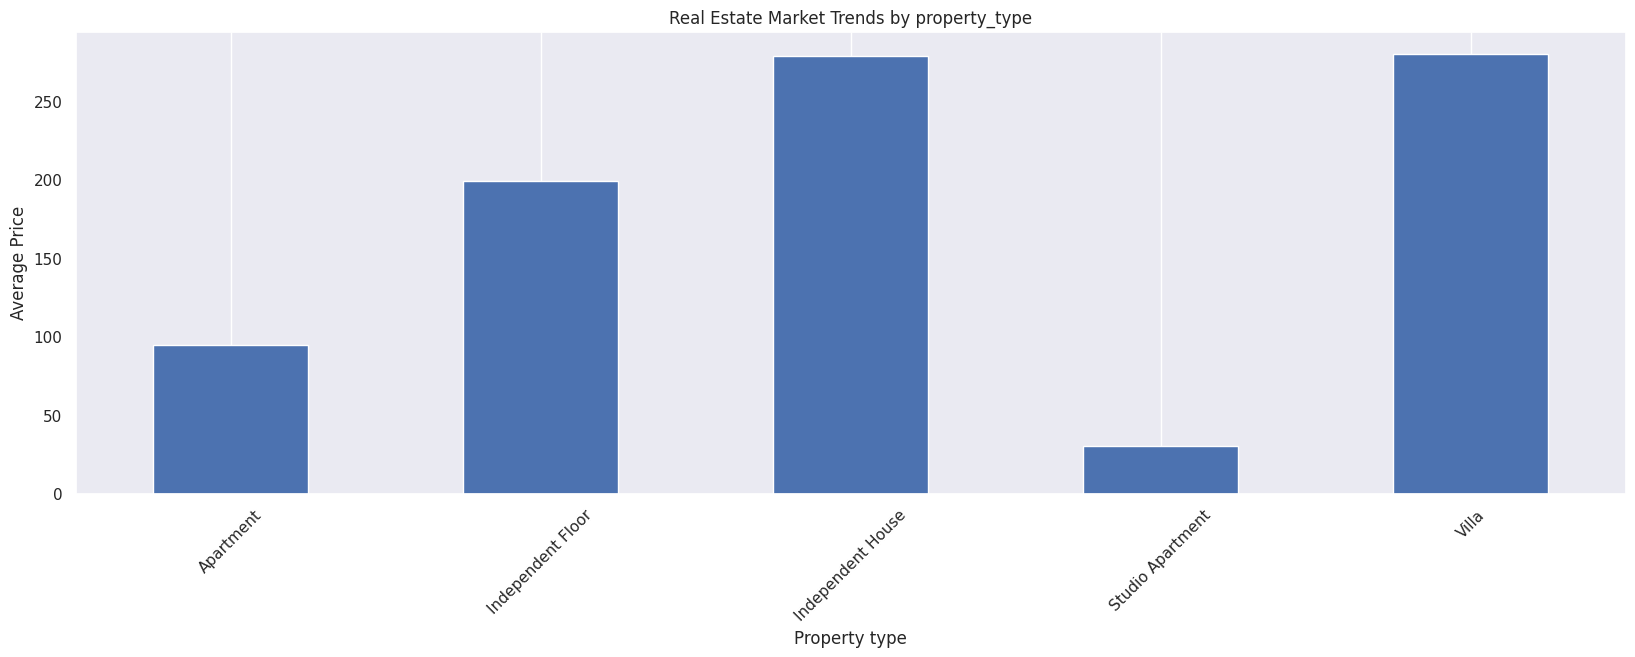

In [ ]:
feature_to_analyze = 'property_type'
avg_prices = df.groupby(feature_to_analyze)['Price'].mean()

plt.figure(figsize=(20, 6))
avg_prices.plot(kind='bar')
plt.title(f'Real Estate Market Trends by {feature_to_analyze}')
plt.xlabel('Property type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Analyzing and visualizing the average property prices for different categories within a selected feature: property types. It presents the market trends in a bar chart, with the x-axis representing categories, y-axis showing average prices, and labels and titles for clarity.

4.7 Property type with respect to Area

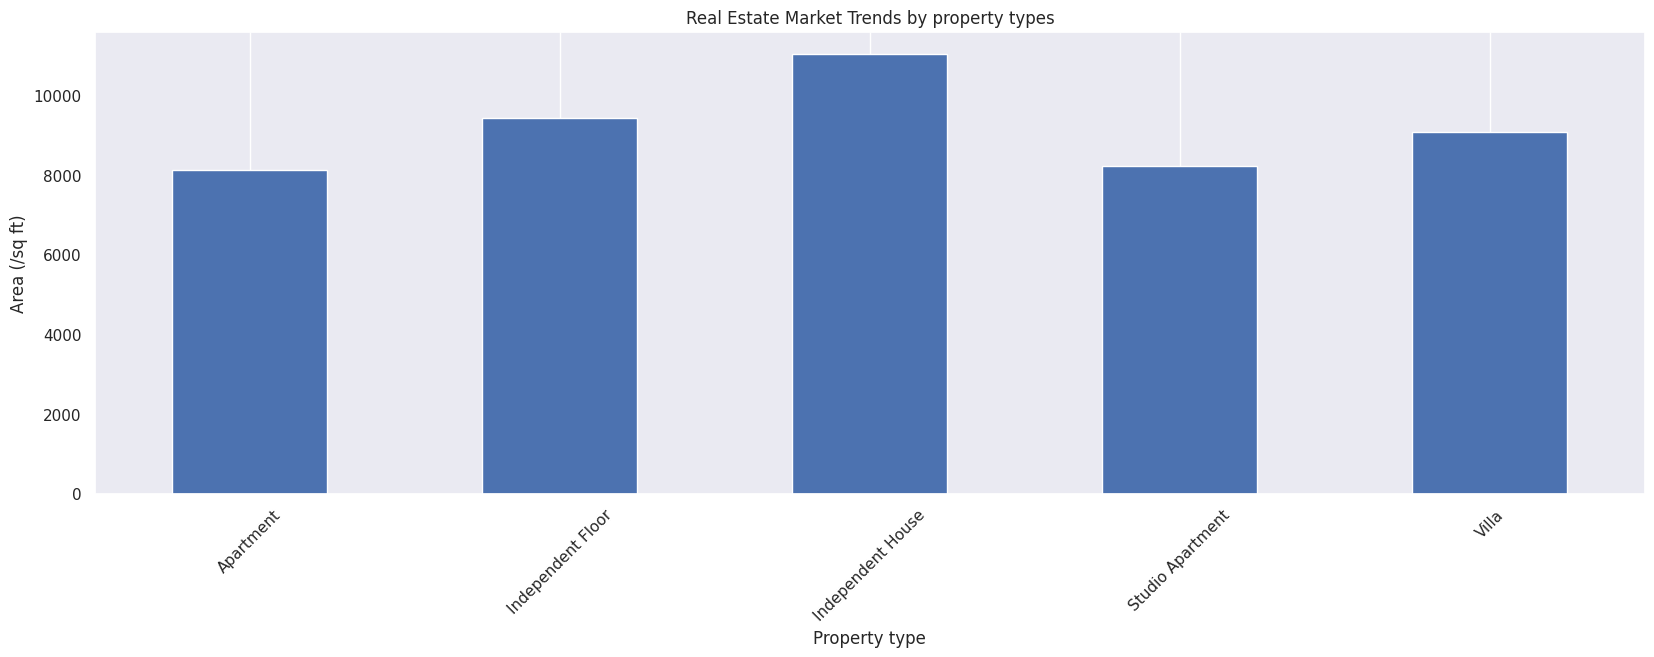

In [ ]:
avg_prices = df.groupby(feature_to_analyze)['Area (/sq ft)'].mean()

plt.figure(figsize=(20, 6))
avg_prices.plot(kind='bar')
plt.title(f'Real Estate Market Trends by property types')
plt.xlabel('Property type')
plt.ylabel('Area (/sq ft)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

 Calculating the average area for each property type, creates a bar chart to visualize these trends, labels the chart with the property types and their average areas, and displays the resulting plot.

4.8 Box plots for price distribution and area distribution

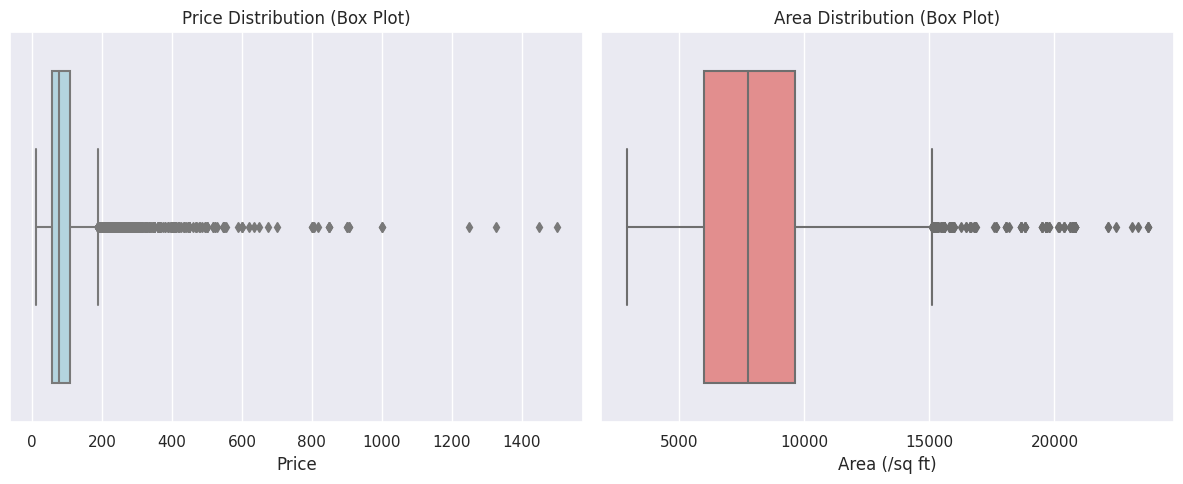

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Price', color='lightblue')
plt.title('Price Distribution (Box Plot)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Area (/sq ft)', color='lightcoral')
plt.title('Area Distribution (Box Plot)')

plt.tight_layout()
plt.show()

Displaying two plots in a single figure: one for the distribution of prices and another for the distribution of property areas, inclusive of outliers






4.9 Scatter plot of price vs area

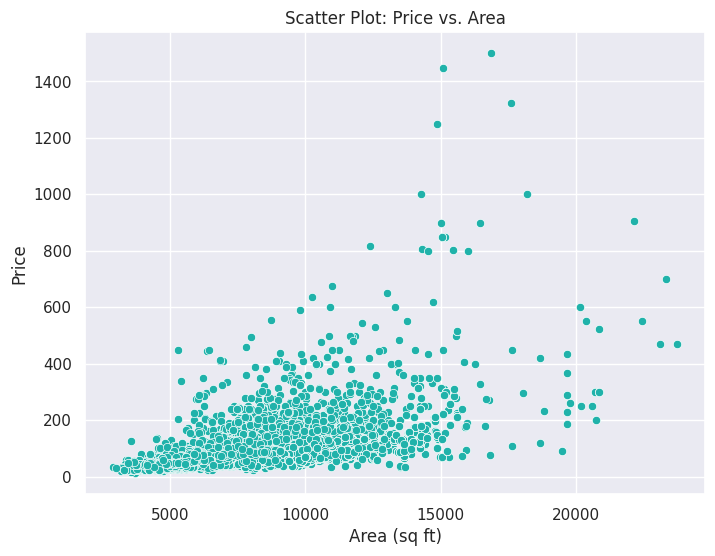

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Area (/sq ft)', y='Price', color='lightseagreen')
plt.title('Scatter Plot: Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

Visualizing the relationship between property prices and areas. It shows how price varies with property area and labels the plot accordingly.

4.10 Heatmap between different sellers and location

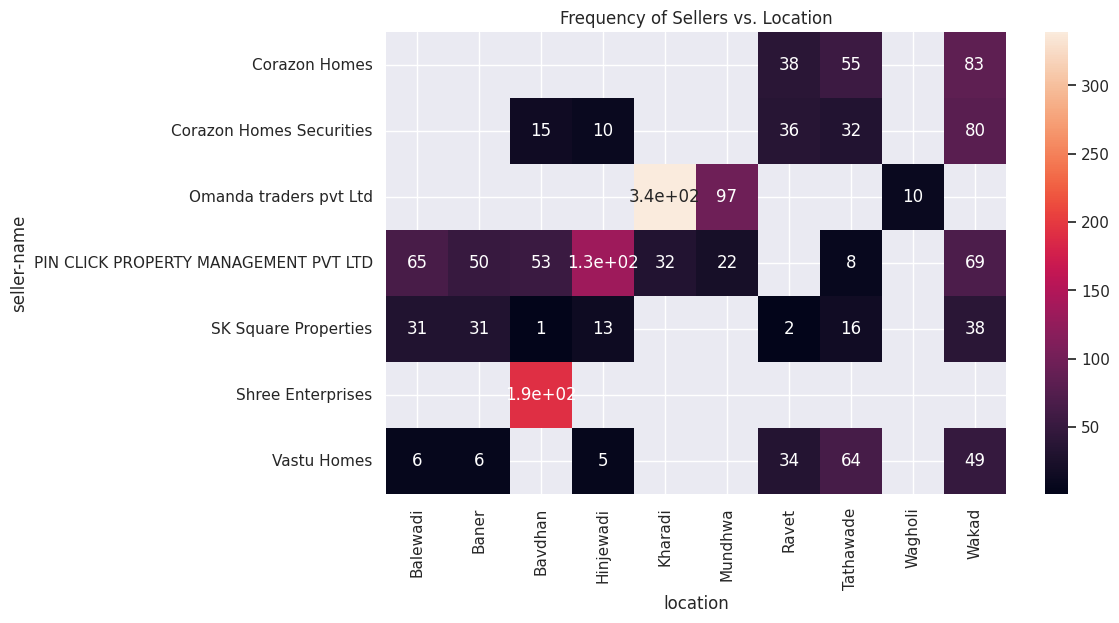

In [ ]:
top_seller_names = df['seller-name'].value_counts().head(10).index
top_locations = df['location'].value_counts().head(10).index

filtered_data = df[(df['seller-name'].isin(top_seller_names)) & (df['location'].isin(top_locations))]

pivot_table = filtered_data.pivot_table(index='seller-name', columns='location', values='Price', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True)
plt.title('Frequency of Sellers vs. Location')
plt.show()

Visualizing the frequency of combinations between the top 10 seller names and top 10 locations using a heatmap. It creates a pivot table to calculate these frequencies and annotates the heatmap to show the counts, providing insights into seller-name and location relationships.






4.11 Bar plot of different sellers

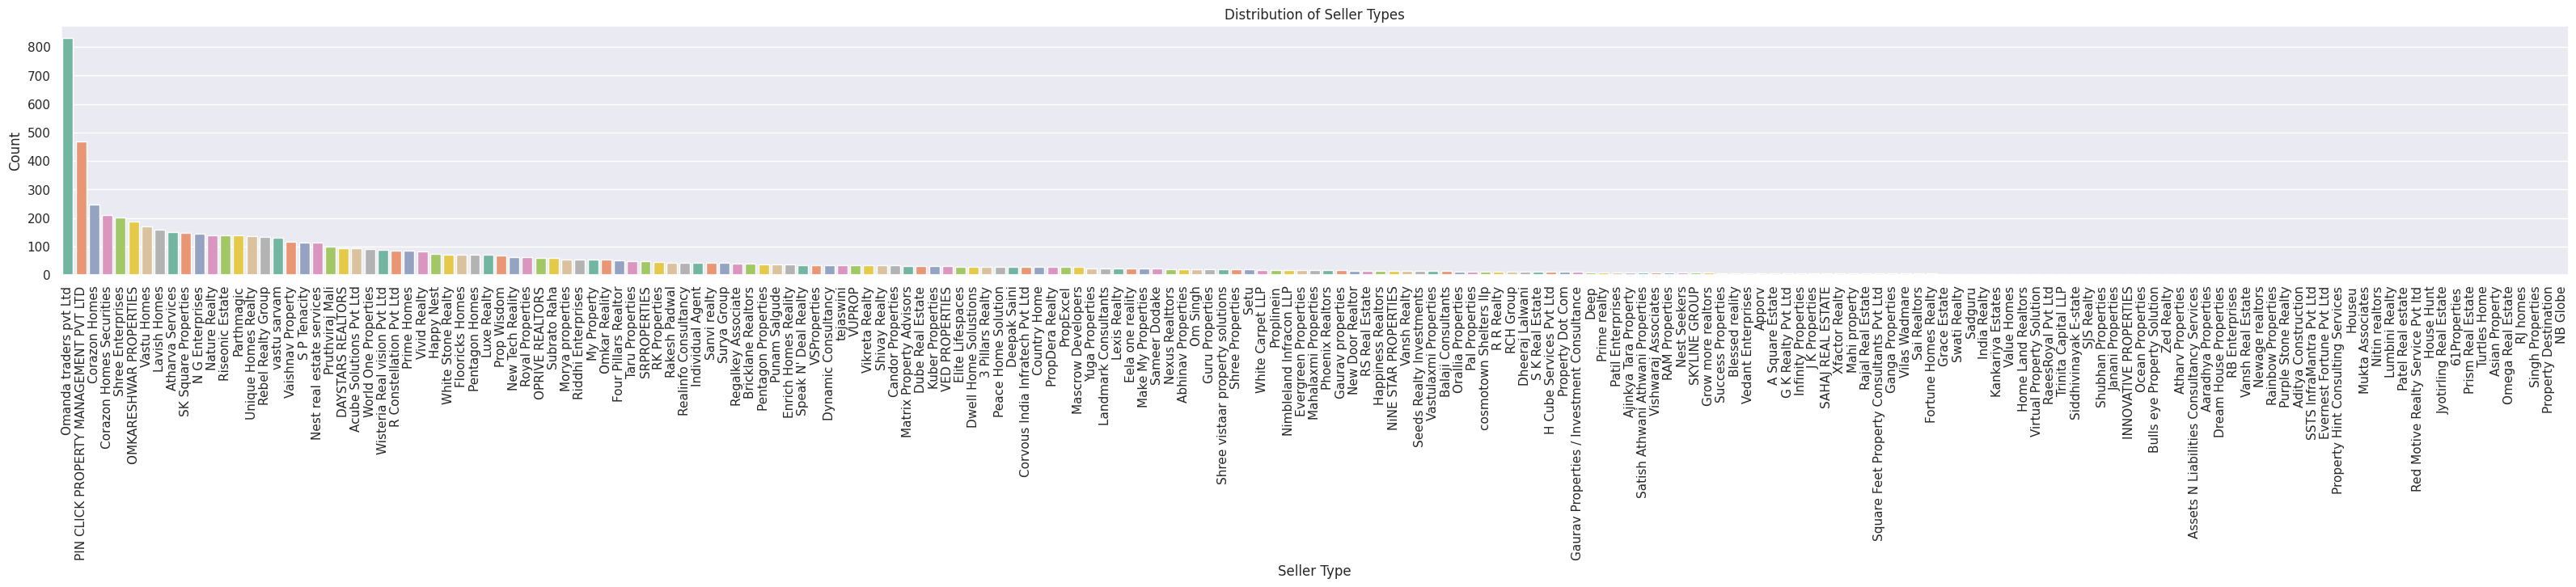

In [ ]:
seller_type_distribution = df["seller-name"].value_counts().reset_index()

plt.figure(figsize=(40, 4))
x = seller_type_distribution["index"]
y = seller_type_distribution["seller-name"]
sns.barplot(x=x, y=y, palette="Set2")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.title("Distribution of Seller Types")
plt.xticks(rotation=90)
plt.show()

Generating a bar chart to visualize the distribution of seller types based on the counts of each unique seller name. It provides insights into the prevalence of different seller types in the dataset.

4.12 Bar plot of top 50 sellers by frequency

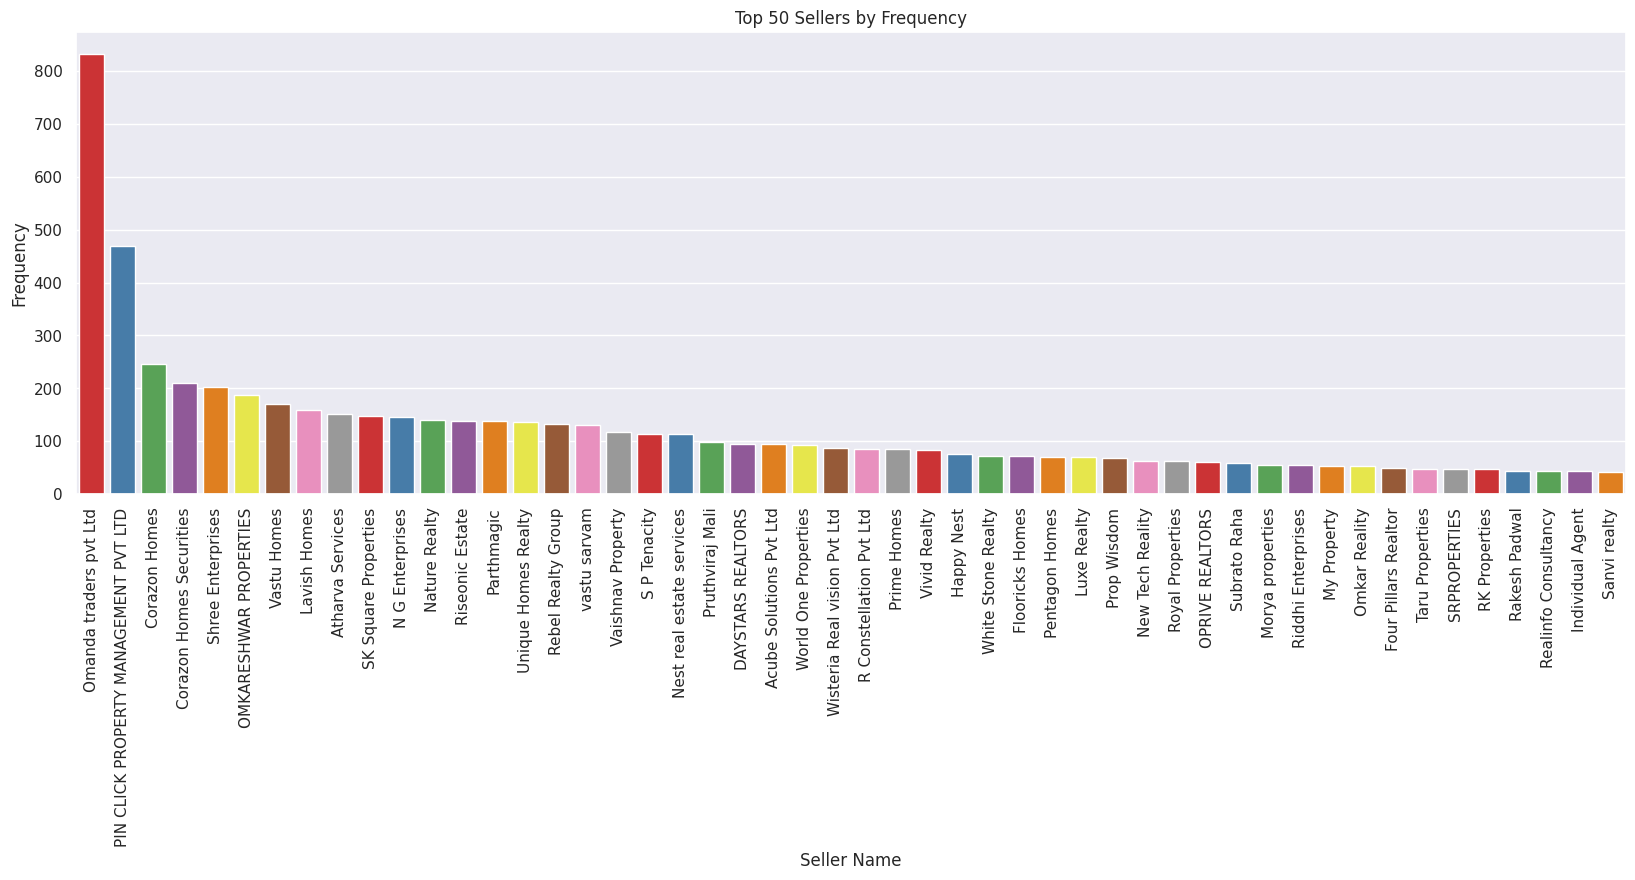

In [ ]:
N = 50
top_sellers = df['seller-name'].value_counts().head(N)

plt.figure(figsize=(20, 6))
sns.barplot(x=top_sellers.index, y=top_sellers.values, palette="Set1")
plt.xlabel("Seller Name")
plt.ylabel("Frequency")
plt.title(f"Top {N} Sellers by Frequency")
plt.xticks(rotation=90)
plt.show()

Identifying and visualizing the top N sellers by frequency in a bar plot. It presents the names of the most frequently occurring sellers and their respective frequencies to highlight the most common sellers in the dataset.

4.13 Pairplot

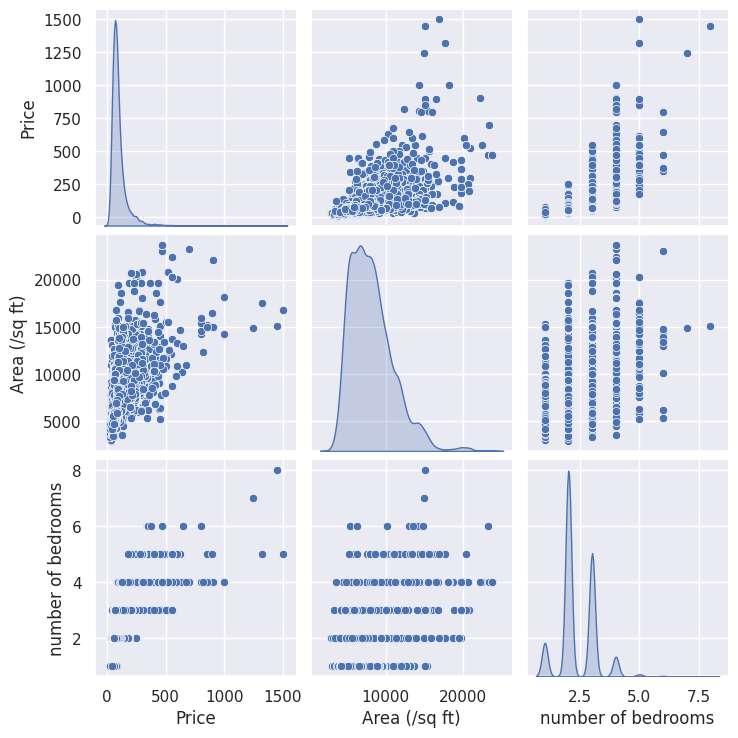

In [ ]:
numerical_columns = ["Price", "Area (/sq ft)", "number of bedrooms"]

sns.set()
sns.pairplot(df[numerical_columns], kind="scatter", diag_kind="kde")
plt.show()

Generateing a pair plot to visualize the relationships and distributions among numerical columns, including 'Price,' 'Area,' and 'Number of Bedrooms.' It provides insights into the pairwise correlations and individual distributions of these numerical features.

In [ ]:
user_budget = float(input("Enter your budget (in INR): "))
user_area_per_sqft = float(input("Enter your required area per sq.ft: "))

Enter your budget (in INR): 800000
Enter your required area per sq.ft: 9000


In [ ]:
filtered_data = df[(df['Price'] <= user_budget) & (df['Area (/sq ft)'] >= user_area_per_sqft)]

In [ ]:
df['Similarity'] = cosine_similarity(
    df[['Price', 'Area (/sq ft)']],
    [[user_budget, user_area_per_sqft]]
)

In [ ]:
sorted_data = df.sort_values(by='Similarity', ascending=False)
top_recommendations = sorted_data[['location', 'property_type', 'projName', 'Price', 'Area (/sq ft)']].head(10)
print("\nTop Recommendations:")
print(top_recommendations)


Top Recommendations:
                     location property_type                         projName  \
1178                   Bopodi     Apartment    ABIL Castel Royale Magnifique   
4844            Koregaon Park     Apartment                INC Amar Westview   
430                  Hadapsar     Apartment                    Marvel Bounty   
1180                 Wanowrie         Villa         Suma Padma Vilas Enclave   
4647            Koregaon Park     Apartment              ABIL Gods Blessings   
646   NIBM Annex Mohammadwadi     Apartment                   Marvel Sangria   
2517                 Hadapsar         Villa  Amanora Sweet Water Villa Plots   
645   NIBM Annex Mohammadwadi     Apartment                   Marvel Sangria   
9694                 Hadapsar     Apartment               Panchshil Yoo Pune   
4646                  Bavdhan         Villa         Venkateshwara The Ridges   

       Price  Area (/sq ft)  
1178  1449.0          15093  
4844  1500.0          16853  
430    